# Data Science for Construction, Architecture and Engineering

### Week 3 - Construction - Pandas Time-Series Data

### Exercise Set 3.1 - Pandas Time-Series I

This set of exercises is the first of two sets for Week 3. These exercises are designed to give you some hands on experience in trying out the concepts from the first set of videos for this week.

There is an introduction video available to explain the process of using this exercise video.

The lead developer of this exercise is James Zhan Sicheng, a Ph.D. student at NUS and a teaching assistant of this course. 

# Exercise 03.1

There are three exercises in this set, focusing on the use of the [Pandas](https://pandas.pydata.org/) functions introduced in the videos: read, resample, truncate and plot.

### Please note that you will need to use the resultant output from Exercise 03.1.3 for the Quiz 3.1.

#### Setup the environment
The cell below is used to load the necessary packages for this exercise and setup the working directory. You will be asked to give the google drive authorization using through a given link.

In [ ]:
import pandas as pd
from google.colab import drive
import os
import numpy as np

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In order to do the following exercises, we will go ahead and load the `meta` data file. Please note that we're using the `os` library again to navigate our file struture to *change the directory* to find the right files.

**Important Note** - if your file structure is different from what you see below, then you will get an error. You will need to change your file locations *or* update the file path

In [ ]:
# read meta data file as pandas dataframe and assign to the corresponding variables
os.chdir("/content/gdrive/MyDrive/MIZZOU/OnlineCourse_edX_DataScienceForArchitectureConstruction/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals")
metadata = pd.read_csv('all_buildings_meta_data.csv')

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     507 non-null    object 
 1   dataend                 507 non-null    object 
 2   datastart               507 non-null    object 
 3   energystarscore         26 non-null     float64
 4   heatingtype             124 non-null    object 
 5   industry                507 non-null    object 
 6   mainheatingtype         122 non-null    object 
 7   numberoffloors          124 non-null    float64
 8   occupants               105 non-null    float64
 9   primaryspaceusage       507 non-null    object 
 10  rating                  131 non-null    object 
 11  sqft                    507 non-null    float64
 12  sqm                     507 non-null    float64
 13  subindustry             507 non-null    object 
 14  timezone                507 non-null    ob

### Exercise 03.1.1 - Loading Meter Data from Specific Files

Sometimes you need to grab and process data only from certain files to analyze. You want to first filter those buildings that have certain attributes.


Use `metadata` to find the specific building that meet the description and retrieve the required information. This code:
- Use the `.loc` function to identify the building located in **America/Phoenix**, having **College Laboratory** as `primaryspaceUsage` and having floor area larger than **30000** `sqm`
- print out the `uid`, `nickname`, `newweatherfilename` and `yearbuilt` of the building

In [ ]:
# Retrieve the required information according to the given conditions
# YOUR CODE HERE
df = metadata[(metadata["timezone"] == "America/Phoenix") & (metadata["primaryspaceusage"] == "College Laboratory") & (metadata["sqm"] > 30000 )]
#df.info()

In [ ]:
df

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
448,UnivLab_Ashlynn,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,327256.0,30403.06417,College/University,America/Phoenix,2012,Ashlynn,UnivLab,weather0.csv


In [ ]:
print(df["uid"])
print(df["nickname"])
print(df["newweatherfilename"])
print(df["yearbuilt"])

448    UnivLab_Ashlynn
Name: uid, dtype: object
448    Ashlynn
Name: nickname, dtype: object
448    weather0.csv
Name: newweatherfilename, dtype: object
448    2012
Name: yearbuilt, dtype: object


Now, use the `read_csv` function to read the following time-series data as Pandas DataFrame: 
1. The meter data file of the identified building (`uid` in the `filtered_metadata`); 
2. The `TemperatureC` and `Humidity` of the identified building (`newweatherfilename` in the `filtered_metadata`);

Tips:
- Be careful about the datatype when getting the values in `filtered_meterdata`
- The weather and meter files are in different folders, and the meter file names need a `.csv` in addition to the name in order to be loaded
- Set the timestamp column as index (`index_col`)
- Have the timestamp as datetime data type (`parse_dates`)
- Keep only the `TemperatureC` and `Humidity` for weather data (`usecols`)

In [ ]:
# Load the specific energy consumption and weather data as identified 
directory = os.chdir("/content/gdrive/MyDrive/MIZZOU/OnlineCourse_edX_DataScienceForArchitectureConstruction/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/meter_data")
filtered_metadata = pd.read_csv('UnivLab_Ashlynn.csv', index_col = "timestamp", parse_dates=True)

directory2 = os.chdir("/content/gdrive/MyDrive/MIZZOU/OnlineCourse_edX_DataScienceForArchitectureConstruction/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/weather_data")
#bringing weather data including 2 columns only
filtered_weatherdata = pd.read_csv('weather0.csv', usecols = ["timestamp", "TemperatureC", "Humidity"], index_col = "timestamp",parse_dates=True)


In [ ]:
print(filtered_metadata.info())
print(filtered_weatherdata.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UnivLab_Ashlynn  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8999 entries, 2015-01-01 00:51:00 to 2015-12-31 23:51:00
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TemperatureC  8999 non-null   float64
 1   Humidity      8990 non-null   float64
dtypes: float64(2)
memory usage: 210.9 KB
None


In [ ]:
filtered_metadata

,UnivLab_Ashlynn
timestamp,
2015-01-01 00:00:00,898.79
2015-01-01 01:00:00,887.98
2015-01-01 02:00:00,892.02
2015-01-01 03:00:00,889.06
2015-01-01 04:00:00,881.37
...,...
2015-12-31 19:00:00,869.86
2015-12-31 20:00:00,864.22
2015-12-31 21:00:00,884.05


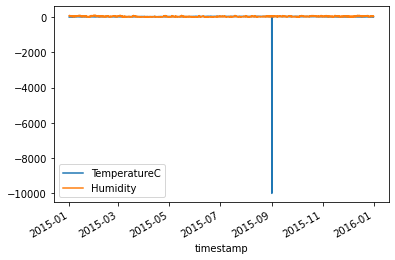

In [ ]:
filtered_weatherdata.plot()

### Exercise 03.1.2 - Resampling Data

As discussed in the videos, very often your IoT data will be at a higher resolution than what you need. Sometimes, the data was not logged at the exact moment as desired and therefore has various timestamps. In a spreadsheet, dealing with these issues can be tricky. With `Pandas`, its much more straightforward.

In this exercise, use the DataFrames of meter and weather data you created to: 
1. create a `all_data` dataframe that holds both the meter data and the weather data at hourly resolution (the resulting dataframe should have a `8760×3` shape)
2. Calculate the weekly **total** energy consumptions and weekly **average** temperature and humidity, save them in a DataFrame called `all_data_weekly` (the resulting dataframe should have a `53×3` shape)

Hint: 
- use `.resample` to unify the timestamp of the two dataframe before `concat` them
- be careful about which axis to `concat`
- the Pandas `resample` function can be used for different basic calculation (e.g. `mean`, `sum`) at different time resolution (e.g. `'H'`, `'M'`)

In [ ]:
# # properly resample and concatenate the data
# all_data_list = []
# all_data_list2 = []
# #for buildingname in list_of_buildings:
#   #df = pd.read_csv(buildingname, index_col = "timestamp", parse_dates=True) 
# df_meter = filtered_metadata.resample("H").mean()
# df_weather = filtered_weatherdata.resample("H").mean()
# all_data_list = all_data_list.append(df_meter)

# all_data_list = all_data_list.append(df_weather)
# #all_data = pd.concat(all_data_list, axis=1)

In [ ]:
df_meter = filtered_metadata.resample("H").mean()
df_weather = filtered_weatherdata.resample("H").mean()

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TemperatureC  8740 non-null   float64
 1   Humidity      8734 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


In [ ]:
#all_data = [df_meter, df_weather]
all_data = pd.concat([df_meter, df_weather], axis=1)

In [ ]:
#Rename the columns
all_data= all_data.rename(columns={"UnivLab_Ashlynn": "Energy Consumption", "TemperatureC": "Temperature"})

Calculate the weekly total energy consumptions and weekly average temperature and humidity, save them in a DataFrame called all_data_weekly (the resulting dataframe should have a 53×3 shape)

In [ ]:
# Do the weekly calculation
# Weekly total energy consumption
df_meter_weekly = df_meter.resample("W").sum()
df_weather_weekly = df_weather.resample("W").mean()


In [ ]:
#all_data = [df_meter, df_weather]
all_data_weekly = pd.concat([df_meter_weekly, df_weather_weekly], axis=1)
all_data_weekly

,UnivLab_Ashlynn,TemperatureC,Humidity
timestamp,,,
2015-01-04,87290.3700,6.510937,59.343750
2015-01-11,158955.9600,16.008929,44.773810
2015-01-18,159683.8825,15.079762,55.090278
2015-01-25,156942.0425,15.709821,32.485119
2015-02-01,152692.5800,15.729315,70.260913
2015-02-08,151874.0900,18.367857,50.428571
2015-02-15,151126.3200,20.463690,36.541667
2015-02-22,152208.6800,18.899405,34.839286
2015-03-01,153489.4000,17.134821,44.276786


In [ ]:
#Rename the columns
all_data_weekly= all_data_weekly.rename(columns={"UnivLab_Ashlynn": "Energy Consumption", "TemperatureC": "Temperature"})
all_data_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2015-01-04 to 2016-01-03
Freq: W-SUN
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Energy Consumption  53 non-null     float64
 1   Temperature         53 non-null     float64
 2   Humidity            53 non-null     float64
dtypes: float64(3)
memory usage: 3.7 KB


### Exercise 03.1.3 - Plotting

One of the most useful things to do in the early phase of the data analysis process is to visualize the data to find interesting behavior, outliers, etc.

In this exercise, use the Pandas `truncate` and `plot` function to plot the bar chart of weekly temperature and energy consumption of the building during July to September 2015.

Here are some tips that you can use in your code:
- The `truncate` function returns the dataframe between the `before` and `after` date
- The pandas `plot.bar` function returns a `matplotlib.axes.Axes` object, which can be referred to as place to plot
- The temperature and energy data are in different range. Therefore, it is better to have two y axis (`ax`), so that the both trends are clearly shown
- A proper `legend` makes a plot with more than one lines more legible
- Axis ticks of larger `fontsize` are also preferred
- The appearance of the bars can be adjusted by `width` and `position`

In this exercise, use the Pandas truncate and plot function to plot the bar chart of weekly temperature and energy consumption of the building during July to September 2015.

In [ ]:
# Process and visualize the data as required
# YOUR CODE HERE
all_data_weekly_JulySep = all_data_weekly.truncate(before = '2015-07-01', after='2015-09-30')
all_data_weekly_JulySep

,Energy Consumption,Temperature,Humidity
timestamp,,,
2015-07-05,152961.42,35.103693,32.867265
2015-07-12,151882.46,34.740476,22.208333
2015-07-19,155239.61,34.390972,33.340278
2015-07-26,156041.86,35.323512,23.217262
2015-08-02,158298.81,34.764266,33.419643
2015-08-09,155126.76,36.016627,28.902778
2015-08-16,150897.55,36.989087,29.247024
2015-08-23,148503.30,36.161310,28.931548
2015-08-30,149015.56,34.601687,36.564484


### Please write down the week with the abnormal average temperature (in the form of '2015-XX-XX') as the answer for the quiz question.

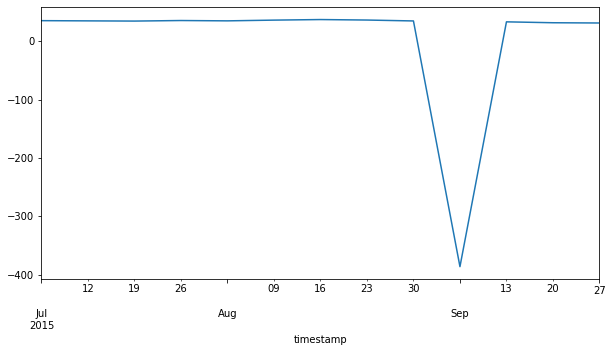

In [ ]:
#Plot the data
all_data_weekly_JulySep["Temperature"].plot(figsize=(10,5))